In [37]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = datasets.load_breast_cancer()
features = list(data.feature_names)
features

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [3]:
X = data['data']
y = data['target']

In [4]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
df = pd.DataFrame(X, columns=features)
target = pd.Series(y)

In [6]:
target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int32

In [33]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [8]:
df.corr()

corr_matrix = np.array(df.corr())

max_corr = 0.0
feature_n1 = ""
feature_n2 = ""

for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        if abs(corr_matrix[i, j]) > max_corr and i != j:
            max_corr = abs(corr_matrix[i, j])
            feature_n1 = features[i]
            feature_n2 = features[j]
            
print(f"max correlation: {max_corr}, {feature_n1}, {feature_n2}")

max correlation: 0.9978552814938113, mean radius, mean perimeter


In [9]:
svc_clf = SVC(probability=True)
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [13]:
clf_voting = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svc_clf)], voting='soft')
clf_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [14]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

In [15]:
for clf in (log_clf, rnd_clf, svc_clf, clf_voting):
	clf.fit(X_train, y_train)
	y_pred = clf.predict(X_test)
	print(clf.__class__.__name__, accuracy_score(y_test, y_pred)*100)

LogisticRegression 98.6013986013986
RandomForestClassifier 95.8041958041958
SVC 97.2027972027972
VotingClassifier 97.9020979020979


In [16]:
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=5, criterion='entropy'), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)
print("Accuracy Score of Bagging Classifier:", accuracy_score(y_test, y_pred)*100)

Accuracy Score of Bagging Classifier: 94.4055944055944


In [17]:
forest_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
forest_clf.fit(X_train, y_train)

y_pred_rf = forest_clf.predict(X_test)
print("Accuracy Score of Random Forest Classifier:", accuracy_score(y_test, y_pred_rf)*100)

Accuracy Score of Random Forest Classifier: 95.8041958041958


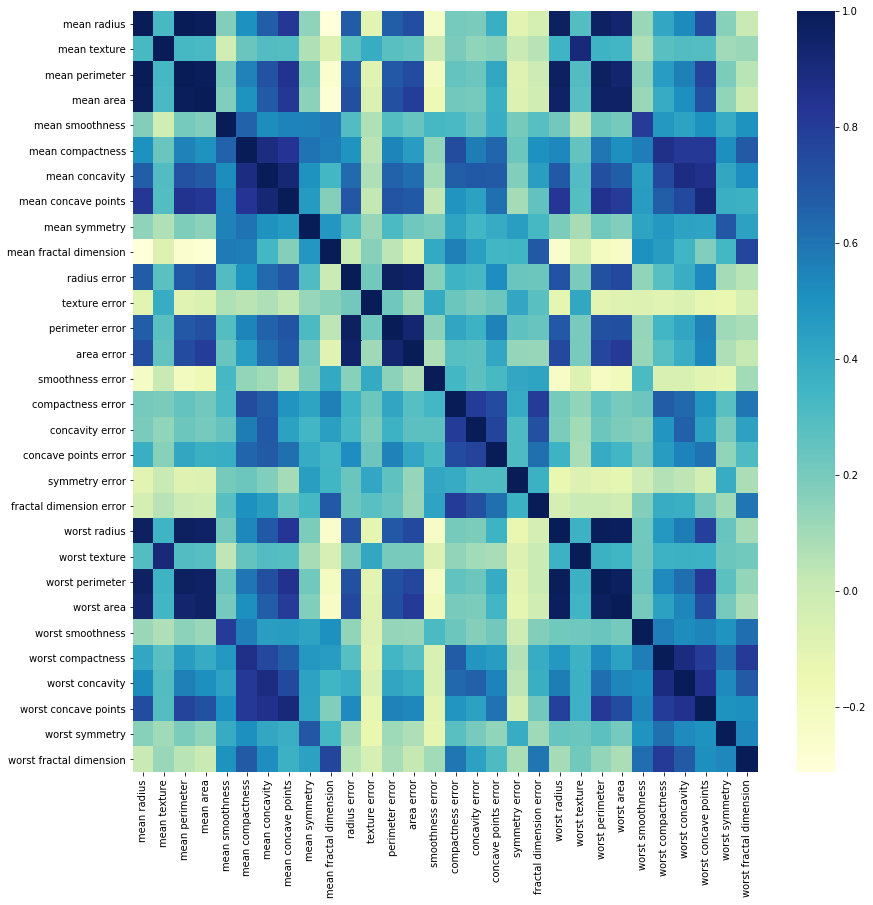

In [38]:
plt.figure(figsize=(14,14))
ax = sns.heatmap(df.corr(), cmap="YlGnBu")

In [18]:
#checking the importance of features, which feature reduces gini-impurity most
#this is a weighted avg(info gain)
best_feature = ""
best_feature_score = 0.0
for feature, score in zip(features, forest_clf.feature_importances_):
    print(feature, f"{round(score*100, 2)}%")
    if score > best_feature_score:
        best_feature_score = score
        best_feature = feature

print(f"Best feature: {best_feature}, score: {round(best_feature_score*100, 2)}%")

mean radius 3.95%
mean texture 1.03%
mean perimeter 3.82%
mean area 4.29%
mean smoothness 0.64%
mean compactness 1.02%
mean concavity 5.31%
mean concave points 10.42%
mean symmetry 0.29%
mean fractal dimension 0.37%
radius error 1.6%
texture error 0.52%
perimeter error 1.38%
area error 4.8%
smoothness error 0.36%
compactness error 0.39%
concavity error 0.65%
concave points error 0.51%
symmetry error 0.4%
fractal dimension error 0.56%
worst radius 10.43%
worst texture 1.57%
worst perimeter 13.02%
worst area 10.84%
worst smoothness 1.55%
worst compactness 1.42%
worst concavity 3.08%
worst concave points 14.33%
worst symmetry 0.7%
worst fractal dimension 0.75%
Best feature: worst concave points, score: 14.33%


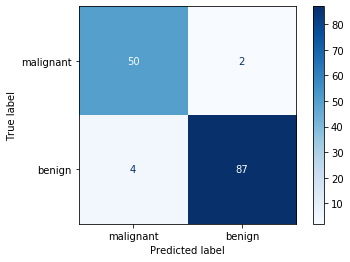

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

class_names = data.target_names
plot_confusion_matrix(forest_clf, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
plt.show()

In [20]:
#Boosting Method 1: Adaptive Boost(AdaBoost)

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm='SAMME.R', learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [21]:
y_pred_adaboost = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_adaboost))

0.972027972027972


In [22]:
print(cross_val_score(ada_clf, X, y, cv=10).mean())

0.9683270676691729


In [23]:
#adaboost method works on ajdusting the model parameters on the training samples it got incorrect in previous predictor
#adaboost => fit each consecutive weak learner in ensemble to the previous models incorrect samples
#gradient boost works on fitting consecutive models on the previous models residual errors

from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=100, learning_rate=0.1)
gbrt.fit(X_train, y_train)

y_pred_gbrt = gbrt.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9440559440559441


In [24]:
#to get the optimal number of weak learn(decisiontreeclassifiers)
#add parameter to GBC constructor warm_start = true
#this will break out our loop and give us the min # of trees 
#needed to prevent overfitting model to our training data

data2 = datasets.load_diabetes()

X = data2['data']
y = data2['target']

In [25]:
feature_names = list(data2.feature_names)

In [26]:
feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [27]:
X_train, x_val, y_train, y_val = train_test_split(X, y)

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error #for regression problems use mse

In [29]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

#try to find min validation error and break out of loop when error (mse) goes up

min_val_error = np.inf
error_going_up = 0

for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(x_val)
    val_error = mean_squared_error(y_val, y_pred)
    
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break #early stopping technique to get optimal # of weak learners

In [30]:
gbrt.n_estimators

42

In [31]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=52, learning_rate=0.5, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.5, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=52,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
y_pred = gbrt.predict(x_val)
mean_squared_error(y_val, y_pred)

3630.410691301623

In [36]:
df.shape

(569, 30)